/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


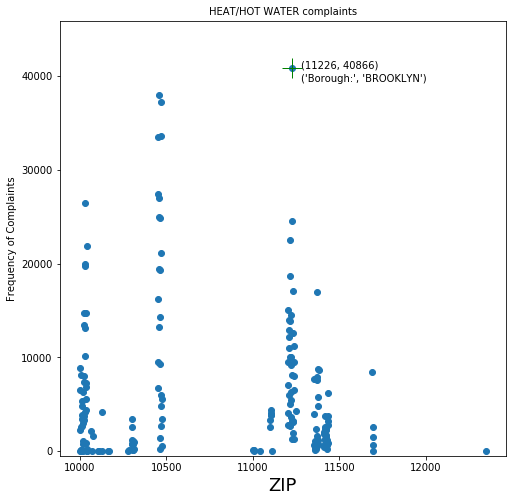

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats  
import seaborn as sns

#import data
url = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"

#Assign dataframe and parse the dates
df = pd.read_csv(url , parse_dates=['created_date'])

# Select only rows with Hot Water
df_complaint = df.loc[df['complaint_type']=='HEAT/HOT WATER'].dropna()

df = df_complaint.loc[:,['borough', 'city', 'incident_zip']]
df = df.loc[~df['incident_zip'].duplicated()]
df = df.sort_values(by = ['incident_zip'], ascending=True)
df.index = range(len(df.index))


# Number of Complaints
df_number_incidents = df_complaint[['incident_zip', 'unique_key']].groupby(['incident_zip']).count()['unique_key']
df_number_incidents.index = range(len(df_number_incidents.index))
df_geo = df_complaint[['incident_zip', 'latitude', 'longitude']]
df_geo = df_geo.groupby(['incident_zip']).mean()
df_geo = df_geo.reset_index()
df_geo.loc[:, 'borough'] = df.loc[:,'borough']
df_geo.loc[:, 'city'] = df.loc[:, 'city']
df_geo['no_of_complaints'] = df_number_incidents
df_geo.head()

arg_max = np.argmax(df_geo.loc[:,'no_of_complaints'])
maximum_complaints = np.max(df_geo.loc[:,'no_of_complaints'])
zip_max_complaints = df_geo.loc[arg_max,'incident_zip']

#Plot the Graph to find localized hotspot
plt.figure(figsize=(8,8))
plt.scatter(df_geo.loc[:,'incident_zip'],df_geo.loc[:,'no_of_complaints'])
plt.plot(zip_max_complaints, maximum_complaints, 'g+', markersize=20)
plt.text(zip_max_complaints+50, maximum_complaints,(int(zip_max_complaints),int(maximum_complaints)))
plt.text(zip_max_complaints+50, maximum_complaints-1500, ('Borough:', 'BROOKLYN'))
plt.xlabel('ZIP', fontsize = 18)
plt.ylabel('Frequency of Complaints', fontsize= 10)
plt.title('HEAT/HOT WATER complaints', fontsize = 10)
plt.ylim((-500, int(maximum_complaints)+5000))
plt.rcParams.update({'font.size': 12})



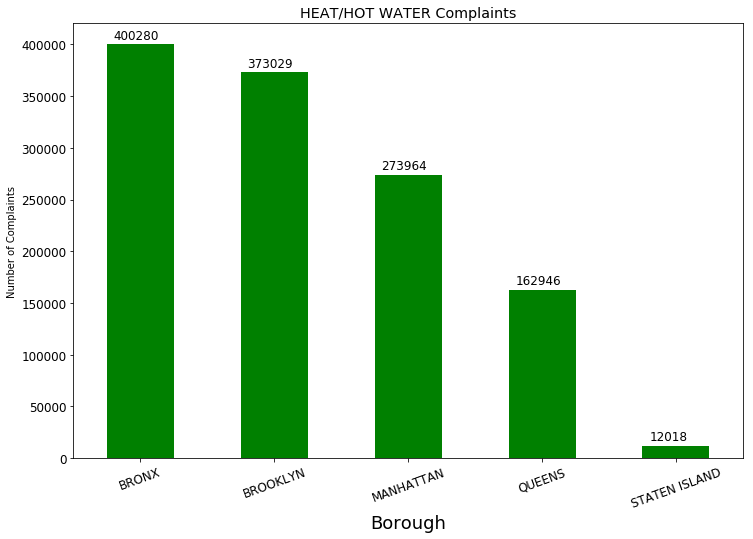

In [3]:
#Plot number of Complaints per Borough to find most affected area
df_borough = df_geo[['borough', 'no_of_complaints']].groupby(['borough']).sum()
df_borough = df_borough.reset_index()
df_borough.loc[:,'val'] = df_borough.loc[:,'no_of_complaints']
df_borough.loc[:,'x'] = range(len(df_borough.no_of_complaints))

ax = df_borough.set_index('borough')['no_of_complaints'].plot(kind='bar', figsize=(12, 8), color='green')
plt.xlabel('Borough', size = 18)
plt.ylabel('Number of Complaints', size = 10)
plt.title('HEAT/HOT WATER Complaints')


def label_point(x, no_of_complaints, val, ax):
    a = pd.concat({'x': x, 'no_of_complaints': no_of_complaints, 'val':val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['no_of_complaints'], str(int(point['val'])))   

        
        
label_point(df_borough.x-0.20, df_borough.no_of_complaints+5000, df_borough.val, ax)
plt.rcParams.update({'font.size': 10})
plt.xticks(rotation = 20)
plt.show()


In [ ]:
#Conclusion : Bronx seems to be affected the most, also the department should focus on zip 11226 with the most localized complaints.